![](http://imgur.com/qCAudtM.png)

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading libraries and retrieving data</a>
- <a href='#3'>3.  Data Visualization</a>

# <a id='1'>1. Introduction</a>


**Overview**

The Indian Premier League (IPL)  is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. There have been ten seasons of the IPL tournament

> 

**Data**

We have 5 different files in the dataset:

**1) DIM_PLAYER.csv:** Details of all the players who have played in IPL alongwith their country, date of birth, batting/bowling style.

**2) DIM_PLAYER_MATCH.csv:**  Various stats of players like team name, captaincy, keeper etc. 

**3) DIM_TEAM.csv: ** IPL team names and ID

**4) FACT_BALL_BY_BALL.csv:** Ball by ball details

**5) DIM_MATCH.csv:** Match details  


# <a id='2'>2. Loading libraries and retrieving data</a>


In [31]:
#Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls




ModuleNotFoundError: No module named 'plotly'

In [32]:
#Importing the datasets 

players = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Data Visualization on Indian Premier League(IPL)\DIM_PLAYER.csv", encoding='ISO-8859-1' )
player_match = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Data Visualization on Indian Premier League(IPL)\DIM_PLAYER_MATCH.csv", encoding='ISO-8859-1' )
team = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Data Visualization on Indian Premier League(IPL)\DIM_TEAM.csv", encoding='ISO-8859-1' )
ball_fact = pd.read_csv (r"C:\Users\user\Desktop\portfolio -E\Data Visualization on Indian Premier League(IPL)\FACT_BALL_BY_BALL.csv", encoding='ISO-8859-1' )
match = pd.read_excel (r"C:\Users\user\Desktop\portfolio -E\Data Visualization on Indian Premier League(IPL)\DIM_MATCH.xlsx", encoding='ISO-8859-1' )



**PLAYER_MATCH**

Let's start by looking at player_match dataset

In [33]:
player_match.head(2)

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,33598700006,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha


In [34]:
player_match.describe(include='all')

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
count,13993.000000,1.399300e+04,1.399300e+04,13993.000000,13992,13992,13992,12862,13992,13992,...,13992.000000,13992.000000,13992.000000,13992.000000,0.0,0.0,13992,13992,13992,13992
unique,NaN,NaN,NaN,NaN,497,482,5,20,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,44,44,46,46
top,NaN,NaN,NaN,NaN,SK Raina,1987-04-30,Right-hand bat,Right-arm offbreak,India,Player,...,NaN,NaN,NaN,NaN,NaN,NaN,MS Dhoni,MS Dhoni,MS Dhoni,MS Dhoni
freq,NaN,NaN,NaN,NaN,160,251,10026,3359,9045,11696,...,NaN,NaN,NaN,NaN,NaN,NaN,1562,1562,1672,1672
mean,19688.092832,6.371377e+10,6.371377e+05,168.732152,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.490566,0.045097,28.349057,0.496855,NaN,NaN,NaN,NaN,NaN,NaN
std,4042.570934,2.350311e+10,2.350311e+05,129.453471,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770944,0.207525,4.805585,0.500008,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2008.000000,0.000000,17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,16191.000000,4.191540e+10,4.191540e+05,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2010.000000,0.000000,25.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,19689.000000,5.483820e+10,5.483820e+05,136.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.000000,0.000000,28.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,23187.000000,8.297460e+10,8.297460e+05,267.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.000000,0.000000,31.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
captain = player_match[player_match['Role_Desc'] == 'Captain']
captain.Player_Name.unique()

array(['R Dravid', 'SC Ganguly', 'Yuvraj Singh', 'V Sehwag', 'SK Warne',
       'Harbhajan Singh', 'VVS Laxman', 'SM Pollock', 'SR Tendulkar',
       'SR Watson', 'MS Dhoni', 'KP Pietersen', 'BB McCullum', 'A Kumble',
       'G Gambhir', 'SK Raina', 'DPMD Jayawardene', 'KC Sangakkara',
       'DJ Bravo', 'DL Vettori', 'V Kohli', 'JR Hopes', 'CL White',
       'DJ Hussey', 'SPD Smith', 'RT Ponting', 'AD Mathews',
       'LRPL Taylor', 'AJ Finch', 'RG Sharma', 'DA Warner', 'GJ Bailey',
       'S Dhawan', 'DJG Sammy', 'JP Duminy', 'Z Khan', 'DA Miller',
       'M Vijay', 'GJ Maxwell', 'AM Rahane', 'KK Nair'], dtype=object)

# <a id='3'>3. Data Visualization</a>

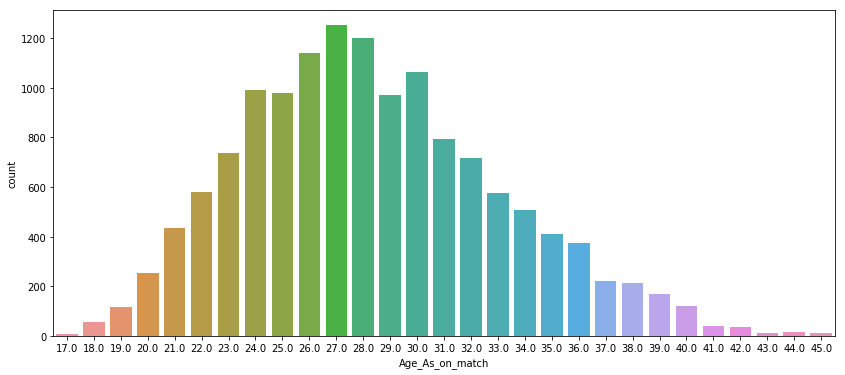

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(x='Age_As_on_match',data=player_match)

Age is normally distributed. There are some young players,  probably talented enough to start playing early. We also observe some older players, well into there 40's,  still playing in the IPL

**Match**

Now let's analyze the second dataset 'Match'

In [37]:
match.head(2)

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1


In [38]:
match.describe(include='all')

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
count,637.000000,6.370000e+02,637,637,637,637.000000,636,637,637,636,634,636,635,637,633,628.000000,637.000000
unique,NaN,NaN,13,13,451,NaN,37,32,3,14,15,4,5,5,202,NaN,NaN
top,NaN,NaN,Royal Challengers Bangalore,Mumbai Indians,2013-04-06 00:00:00,NaN,M Chinnaswamy Stadium,Mumbai,India,Mumbai Indians,Mumbai Indians,field,wickets,Result,CH Gayle,NaN,NaN
freq,NaN,NaN,85,85,2,NaN,66,85,560,85,91,315,339,626,18,NaN,NaN
first,NaN,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,318.000000,6.378825e+05,NaN,NaN,NaN,2012.497645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.272293,1.152276
std,184.030342,2.356312e+05,NaN,NaN,NaN,2.776600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.212632,0.438388
min,0.000000,3.359870e+05,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,159.000000,4.191550e+05,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000


In [39]:
match.isnull().sum(axis=0)

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      1
City_Name       0
Country_Name    0
Toss_Winner     1
match_winner    3
Toss_Name       1
Win_Type        2
Outcome_Type    0
ManOfMach       4
Win_Margin      9
Country_id      0
dtype: int64

In [40]:
#Number of teams
print("Number of unique teams: ",match.Team1.unique())

Number of unique teams:  ['Royal Challengers Bangalore' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Delhi Daredevils' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Mumbai Indians' 'Rising Pune Supergiants' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors']


In [41]:
#Most man of the matches awards
ManofMatch = match.groupby(['ManOfMach']).count()['match_winner']
ManOfMatch_count = ManofMatch.sort_values(axis=0, ascending=False)
ManOfMatch_count.head()

ManOfMach
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: match_winner, dtype: int64

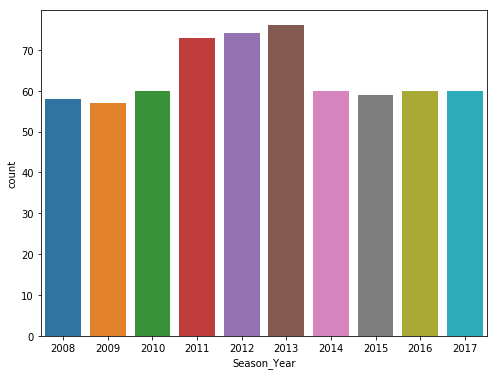

In [42]:
#number of matches per season
plt.figure(figsize=(8,6))
sns.countplot(x='Season_Year', data=match) 


Number of games increased during 2011-2013

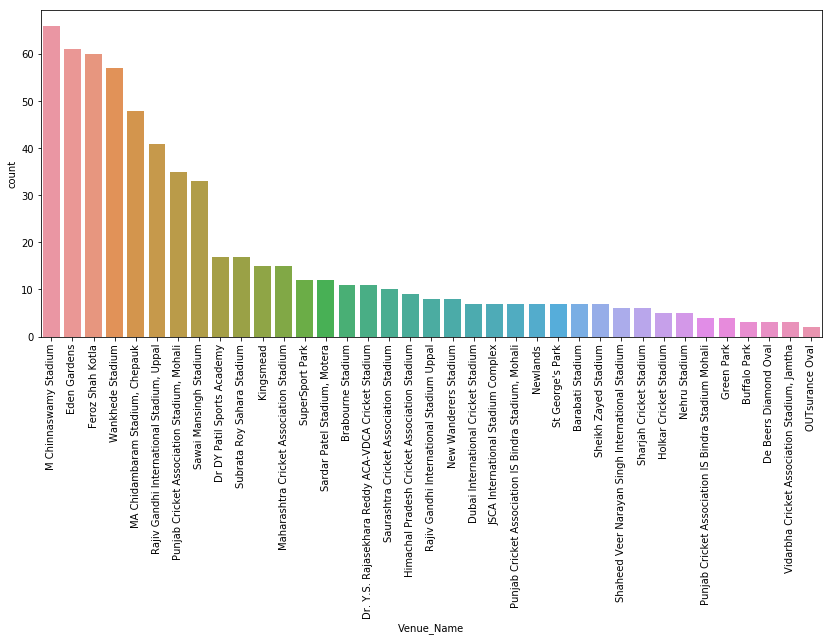

In [43]:
#Number of matches per venue 
plt.figure(figsize=(14,6))
sns.countplot(x='Venue_Name', data=match, order=pd.value_counts(match['Venue_Name']).index) 
plt.xticks(rotation='vertical')
plt.show()

Big cities with a home team have hosted more matches with M Chinnaswamy Stadium leading till 2017 followed by Eden Gardens and Feroz Shah Kotla

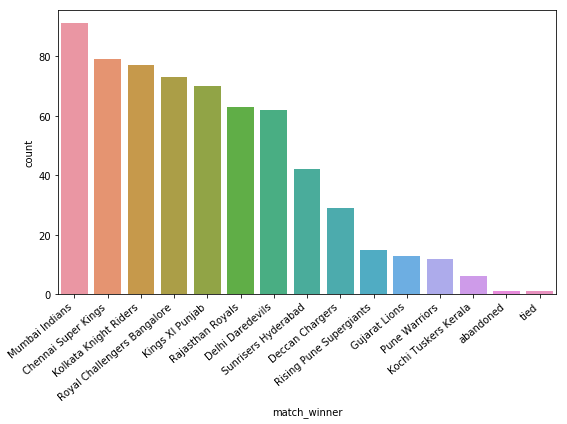

In [44]:
#Wins per team
plt.figure(figsize=(8,6))
ax=sns.countplot(x='match_winner', data=match, order=pd.value_counts(match['match_winner']).index) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Mumbai has most wins followed by Chennai and than Kolkata. Now, let's see who's winning the toss more often

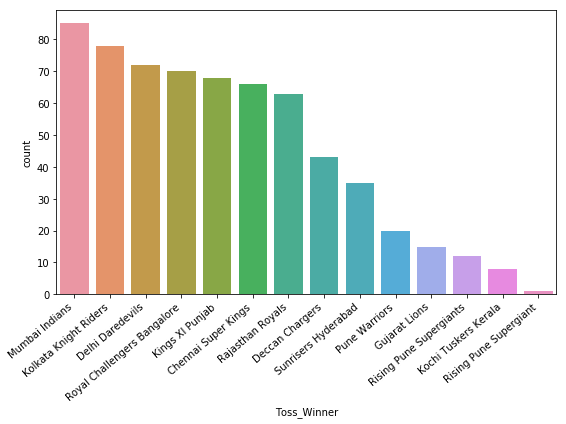

In [45]:
#Toss wins per team
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Toss_Winner', data=match, order=pd.value_counts(match['Toss_Winner']).index) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Again it's Mumbai who's winning the toss more often. Let's see what are the teams doing after winning the toss over the years

In [46]:
match.replace(to_replace='Field', value = 'field', inplace=True) #Replace 'Field' with 'field'

In [47]:
match.replace(to_replace='Bat', value = 'bat', inplace=True) #Replace 'Bat' with 'bat'

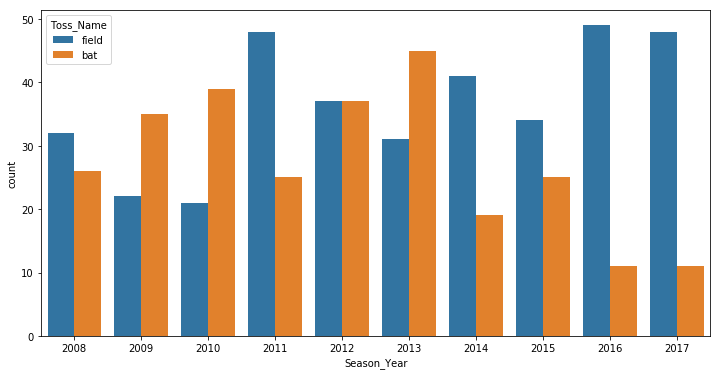

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='Season_Year', hue='Toss_Name', data=match)

Teams used to bat first after winning the toss during initial years of IPL.  But we see there's a clear change in this pattern, specially last couple of years. 

In [49]:
match.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1


**PLAYER**

Now let's look at the third dataset 'Player'

In [50]:
players.head(2)

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand


Let's look at the batting and bowling styles of IPL Players

In [51]:
players.replace(to_replace=' Right-hand bat', value = 'Right-hand bat', inplace=True) #Clean the data 

In [52]:
players.replace(to_replace=' Left-hand bat', value = 'Left-hand bat', inplace=True) #Clean the data 

In [53]:

players.replace(to_replace='Right-handed', value = 'Right-hand bat', inplace=True) #Clean the data 

In [54]:
temp = players["Batting_hand"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Batting Style",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Batting Style",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

NameError: name 'iplot' is not defined

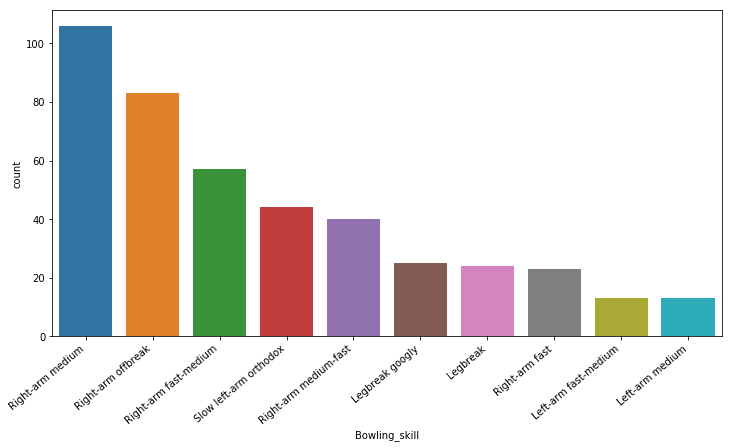

In [55]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Bowling_skill', data=players, order=pd.value_counts(players['Bowling_skill']).iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Right arm bat and Right arm medium are clearly more popular

Now, let's look at the countries.

In [56]:
agg = players['Country_Name'].value_counts()[:10]
labels = list(reversed(list(agg.index )))
values = list(reversed(list(agg.values)))

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))
layout = dict(title='Top Countries', legend=dict(orientation="h"));


fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')


NameError: name 'go' is not defined

Most players are from India followed by Australia and South Africa

**BALL FACT**

I will now quickly dive into the next dataset Ball Fact. This has lot of information about each ball bowled in the IPL

In [57]:
ball_fact.describe(include='all')

,Ball_key,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,StrikerKey,NonStrikerKey,...,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk
count,1.504510e+05,1.504510e+05,150451.000000,150451.000000,150451.000000,150451.0,150451.0,136590.000000,1.504510e+05,1.504510e+05,...,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,150451.000000,13861.000000
unique,NaN,NaN,NaN,NaN,NaN,23.0,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,16975.0,16019.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.362075e+12,6.362075e+05,10.142704,3.616639,1.482190,NaN,NaN,3.583637,6.362075e+10,6.362075e+10,...,134.623419,689.975108,4.526730,19676.764555,193.087098,970.324278,4.346272,4.332806,0.000432,11.947334
std,2.343623e+12,2.343623e+05,5.674255,1.807638,0.501768,NaN,NaN,2.145090,2.343623e+10,2.343623e+10,...,120.070411,3698.806643,37.215835,4026.168474,132.998950,4353.992290,3.217641,3.219607,0.020781,66.254798
min,3.359870e+12,3.359870e+05,1.000000,1.000000,1.000000,NaN,NaN,1.000000,3.359870e+10,3.359870e+10,...,0.000000,-1.000000,-1.000000,12697.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.191540e+12,4.191540e+05,5.000000,2.000000,1.000000,NaN,NaN,2.000000,4.191540e+10,4.191540e+10,...,39.000000,-1.000000,-1.000000,16175.000000,76.000000,-1.000000,2.000000,2.000000,0.000000,-1.000000
50%,5.483820e+12,5.483820e+05,10.000000,4.000000,1.000000,NaN,NaN,3.000000,5.483820e+10,5.483820e+10,...,95.000000,-1.000000,-1.000000,19674.000000,173.000000,-1.000000,4.000000,4.000000,0.000000,-1.000000
75%,8.297420e+12,8.297420e+05,15.000000,5.000000,2.000000,NaN,NaN,5.000000,8.297420e+10,8.297420e+10,...,207.000000,-1.000000,-1.000000,23131.000000,309.000000,-1.000000,6.000000,6.000000,0.000000,-1.000000


An extra is a run scored by a means other than a batsman hitting the ball. Other than runs scored off the bat from a no-ball, a batsman is not given credit for extras and the extras are tallied separately on the scorecard and count only towards the team's score. Let's see how many extras, aka free runs, the teams are giving:

In [58]:
ball_fact.Extra_Type.unique()

array(['legbyes', 'No Extras', 'wides', 'byes', 'noballs', 'penalty',
       'Wides', 'Legbyes', 'Byes', 'Noballs'], dtype=object)

Extra types in our data are not clean. For e.g. 'wides' is also in the dataset as 'Wides', 'noballs --> 'Noballs'. Let's clean this up. 

In [59]:
ball_fact.replace(to_replace='Wides', value = 'wides', inplace=True) #Replace Wides with wides

In [60]:
ball_fact.replace(to_replace='Legbyes', value = 'legbyes', inplace=True) #Legbyes with legbyes

In [61]:
ball_fact.replace(to_replace='Noballs', value = 'noballs', inplace=True) #Noballs with noballs

In [62]:
ball_fact.replace(to_replace='Byes', value = 'byes', inplace=True) #Byes with byes

In [63]:
ball_df = ball_fact[ball_fact['Extra_Type']  != 'No Extras']
agg = ball_df['Extra_Type'].value_counts()[:10]
labels = list(reversed(list(agg.index )))
values = list(reversed(list(agg.values)))

trace1 = go.Bar(x=values, y=labels, opacity=0.75, orientation='h', name="month", marker=dict(color='rgba(0, 20, 50, 0.6)'))
trace1 = go.Pie(labels=labels, values=values)
layout = dict(title='Extras given', legend=dict(orientation="h"));


fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

NameError: name 'go' is not defined

More than half of the extra run given are through Wide. 

Dismissal:  Dismissal occurs when the batsman is out (also known as the fielding side taking a wicket and/or the batting side losing a wicket). At this point, a batsman must discontinue batting and leave the field permanently for the innings.  Let's see how the players are getting dismissed:

In [ ]:
ball_df = ball_fact[ball_fact['Out_type']  != 'Not Applicable']
agg = ball_df['Out_type'].value_counts()[:10]
labels = list(reversed(list(agg.index )))
values = list(reversed(list(agg.values)))

trace1 = go.Bar(x=values, y=labels, opacity=0.75, orientation='h', name="month", marker=dict(color='rgba(0, 20, 50, 0.6)'))
trace1 = go.Pie(labels=labels, values=values)
layout = dict(title='Out Type', legend=dict(orientation="h"));


fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

Most of the players are getting caught, followed by getting bowled


*Thanks for reading the Kernel. I will continue updating this. **Please leave a comment** for any suggestions*